# Linear Regression

Importing all the required Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import warnings as wr
# wr.filterwarnings('ignore')

Reading the Data

In [2]:
df = pd.read_csv('Height-Weight Data.csv') # Read the data from the CSV file and store it in a Data Frame

In [3]:
df.head() # showing the top 5 rows from the Data Frame

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape # showing the shape (number of rows and columns) of the data frame

(3501, 2)

There are 3501 rows and 2 columns in the data frame

In [24]:
df.info() # showing the detail informaiton (column names with number of rows, data type etc.) of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [25]:
df.describe() # showing the description (count, mean, standard deviation, minimum, quartiles and maximum) of the data frame

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [22]:
df.isnull().sum() # Checking is there any null value in the Data frame

Height    0
Weight    0
dtype: int64

See the distribution of the data in a Scatter Plot (considering y = Weight)

Text(0.5, 1.0, 'Height vs Weight')

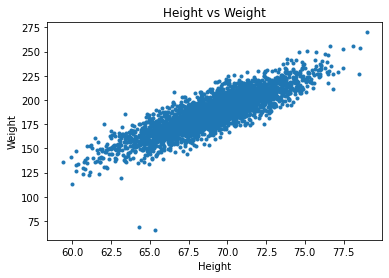

In [10]:
plt.scatter(x=df['Height'], y=df['Weight'], marker='.') # drow the scatter plot
plt.xlabel('Height') # Provide the X Label
plt.ylabel('Weight') # Provide the Y Label
plt.title('Height vs Weight') # Include a Title

In [11]:
x = df[['Height']] # Create a new data frame x with the column Height (as the Independent Variable) from the data frame df
x.head() # showing the top 5 rows from the Data Frame x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [13]:
x.shape # showing the shape (number of rows and columns) of the data frame x

(3501, 1)

In [16]:
x.mean() # showing the mean value of the data frame x from 3501 rows of the data frame

Height    69.024411
dtype: float64

In [12]:
y = df[['Weight']] # Create a new data frame y with the column Weight (as the Dependent Variable) from the data frame df
y.head() # showing the top 5 rows from the Data Frame y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [14]:
y.shape # showing the shape (number of rows and columns) of the data frame y

(3501, 1)

In [20]:
y.Weight.mean() # showing the mean value of Weight from 3501 rows of the data frame y

186.89125797946284

#### Now Splitting the Data into Training and Test for further Modeling

In [26]:
from sklearn.model_selection import train_test_split # importing the necessary module

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42) # training data=75% and testing data=25%

In [32]:
# xtrain.shape # 2625 rows = 75%
xtest.shape # 876 rows = 25%

(876, 1)

In [29]:
xtrain.head() # top 5 rows from the training data x

,Height
2538,67.777637
2847,75.282847
2641,65.521633
366,72.987070
2172,68.166106


In [30]:
ytrain.head() # top 5 rows from the training data y (with the same index numbers)

,Weight
2538,191.498221
2847,219.113210
2641,159.936436
366,209.637975
2172,197.179570


### Apply Linear Regression

In [33]:
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

#### Train the Model (with Training Data Set)

In [36]:
lr.fit(xtrain, ytrain) # Train the model with the x and y training data set

LinearRegression()

In [37]:
m = lr.coef_ # Estimated coefficient/slope for the linear regression problem 
m

array([[5.95677818]])

In [38]:
c = lr.intercept_ # Intercept for the linear regression model
c

array([-224.37950904])

In [39]:
yp = (m*70)+c # as [y = mx+c]
yp # Predicted y

array([[192.59496344]])

In [40]:
lr.predict([[70]])

C:\Users\ZIR\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[192.59496344]])

In [42]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [64]:
# df['Predicted_Weight'] = lr.predict(df[['Height']]) # Add a new column Predicted_Weight with the value Predicted Weight
df['Predicted_Weight'] = lr.predict(x) # Add a new column Predicted_Weight with the value Predicted Weight
df.head()

,Height,Weight,Predicted_Weight
0,73.847017,241.893563,215.510790
1,68.781904,162.310473,185.339036
2,74.110105,212.740856,217.077950
3,71.730978,220.042470,202.906018
4,69.881796,206.349801,191.890848


In [63]:
# df.drop(columns=['Predicted_Weight'],axis=1,inplace=True)

See the distribution of the data again in a Scatter Plot

InvalidIndexError: (slice(None, None, None), None)

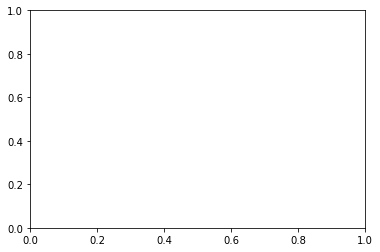

In [65]:
# plt.plot(x.squeeze(), df[['predicted_weight']])
plt.plot(x, df[['Predicted_Weight']])      # plt.plot(x.squeeze(), df[['predicted_rent']])
plt.scatter(x, df[['Predicted_Weight']])
plt.scatter(x, df[['Weight']])

#### Model Evaluation

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
mse = mean_squared_error(ytest, lr.predict(xtest)) # ytest = y actual data, lr.predict(xtest) = y predictioin data
mse # Mean Squared Error

102.58008244753078

MSE output is non-negative floating point. The best value is 0.0

In [69]:
mae = mean_absolute_error(ytest, lr.predict(xtest)) # ytest = y actual data, lr.predict(xtest) = y predictioin data
mae # Mean Absulate Error (Mean squared error regression loss)

8.19923455884978

MAE output is non-negative floating point. The best value is 0.0

In [70]:
lr.score(xtest, ytest)

0.7383400158579423

InvalidIndexError: (slice(None, None, None), None)

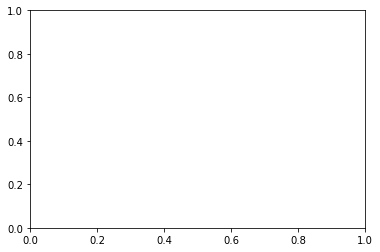

In [71]:
plt.plot(xtest, lr.predict(xtest))      # plt.plot(x.squeeze(), df[['predicted_rent']])
plt.scatter(xtest, lr.predict(xtest))
#plt.scatter(x, df[['rent']])
plt.scatter(xtest, ytest)